In [45]:
import pandas as pd
import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt
import collections
import geopandas as gpd
import os
%matplotlib inline

In [46]:
json_file = open("../data/porto_boundary.geojson")
graphml_file = '../data/porto.graphml'
network_graph = ox.io.load_graphml(graphml_file)

train_data = pd.read_csv('../data/train-1000.csv')
fmm_result = pd.read_csv('../result/task3/fmm_result.csv')

In [47]:
fmm_result.head(10)

,t_number,cpath,opath,offset,length,spdist,mgeom,pgeom
0,1,"[1088, 4263, 1086, 697, 11002, 136451, 11001, ...","[1088, 1088, 4263, 4263, 1086, 1086, 697, 697,...","[0.005765244498603186, 0.0059112713802073075, ...","[0.007070636992543766, 0.007070636992543766, 0...","[0.0, 0.0001460268816041218, 0.004467393434995...","LINESTRING(-8.6186233 41.141456,-8.6183463 41....","LINESTRING(-8.6186233 41.141456,-8.6184903 41...."
1,2,"[38161, 163749, 163756, 163751, 6714, 40782, 7...","[38161, 38161, 6714, 40782, 758, 40744, 40756,...","[0.001679679404078842, 0.002184332192417357, 0...","[0.0031900600126394565, 0.0031900600126394565,...","[0.0, 0.0005046527883385151, 0.001860065032457...","LINESTRING(-8.6398592 41.159752,-8.6400962 41....","LINESTRING(-8.6398592 41.159752,-8.6403572 41...."
2,3,"[109172, 699, 114117, 114115, 703, 150650, 150...","[109172, 699, 150649, 111107, 136463, 136463, ...","[0.0008091434637423619, 0.0, 3.365446347988685...","[0.0008971800885218301, 0.0012153941418267273,...","[0.0, 8.803662477946817e-05, 0.002990747990442...","LINESTRING(-8.6135064 41.141371,-8.6134714 41....","LINESTRING(-8.6135064 41.141371,-8.613438 41.1..."
3,4,"[81487, 999, 1001, 989, 182947, 1009, 5175, 15...","[81487, 81487, 81487, 81487, 81487, 81487, 814...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00106030...","[0.008715180515387088, 0.008715180515387088, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00106030...","LINESTRING(-8.5747537 41.151899,-8.5747993 41....","LINESTRING(-8.5747537 41.151899,-8.5747537 41...."
4,5,"[158301, 158299, 110258, 158304, 7992, 7995, 7...","[158301, 158301, 158299, 7995, 7996, 134090, 7...","[0.0008438441597467526, 0.0008438441597467526,...","[0.0008438441597467525, 0.0008438441597467525,...","[0.0, 0.0, 0.0005535986566614134, 0.0016052885...","LINESTRING(-8.6457599 41.180528,-8.645788 41.1...","LINESTRING(-8.6457599 41.180528,-8.6457599 41...."
5,6,"[136462, 112657, 111106, 150648, 109172, 700, ...","[136462, 112657, 700, 41121, 103433, 103433, 1...","[0.00029872924470416667, 0.0004862269106399432...","[0.0005065382325010453, 0.0007209762308815689,...","[0.0, 0.0006940358984368219, 0.001630642833119...","LINESTRING(-8.6155137 41.14071,-8.6154822 41.1...","LINESTRING(-8.6155137 41.14071,-8.6148591 41.1..."
6,7,"[182947, 1009, 5175, 15436, 7251, 15485, 16154...","[182947, 1009, 1009, 5175, 7251, 161547, 16154...","[0.00011159047601323411, 0.001445330082805124,...","[0.0005123139635231992, 0.005016734538277715, ...","[0.0, 0.001846053570315089, 0.0018298624786857...","LINESTRING(-8.5794962 41.145933,-8.5795208 41....","LINESTRING(-8.5794962 41.145933,-8.5809387 41...."
7,8,"[1346, 1383, 6204, 112081, 1381, 112123, 10111...","[1346, 1346, 1383, 112081, 112081, 112123, 112...","[0.00021142601299816826, 0.0005433589361165046...","[0.0014652773005510498, 0.0014652773005510498,...","[0.0, 0.00033193292311833633, 0.00133109925629...","LINESTRING(-8.6176424 41.146162,-8.6173499 41....","LINESTRING(-8.6176424 41.146162,-8.6175629 41...."
8,9,"[111609, 41120, 701, 111608, 111541, 111609, 4...","[111609, 111609, 701, 111608, 111608, 111608, ...","[0.001259760424896037, 0.0012704539184338753, ...","[0.003092796412508857, 0.003092796412508857, 0...","[0.0, 1.0693493537838406e-05, 0.00651017029238...","LINESTRING(-8.6117935 41.140552,-8.6117292 41....","LINESTRING(-8.6117935 41.140552,-8.6117829 41...."
9,10,"[4262, 136462, 112657, 111106, 150648, 109172,...","[4262, 150648, 109172, 81990, 114067, 28293, 2...","[0.0016224846817734847, 2.9620763437706456e-05...","[0.001745482324266452, 0.00021255799208567004,...","[0.0, 0.0015518784059306739, 0.001006209206102...","LINESTRING(-8.6159133 41.140575,-8.6157974 41....","LINESTRING(-8.6159133 41.140575,-8.6144502 41...."


In [48]:
gdf_edges = gpd.read_file('../data/porto_by_city/edges.shp',index_col='fid')
gdf_nodes = gpd.read_file('../data/porto_by_city/nodes.shp')
# network_graph = ox.utils_graph.graph_from_gdfs(gdf_nodes, gdf_edges)

In [49]:
print(gdf_edges.columns)
print(gdf_edges['fid'])
print(gdf_edges['geometry'])

Index(['osmid', 'oneway', 'highway', 'length', 'lanes', 'ref', 'maxspeed',
       'bridge', 'name', 'width', 'access', 'junction', 'tunnel', 'service',
       'area', 'u', 'v', 'key', 'fid', 'geometry'],
      dtype='object')
0              0
1              1
2              2
3              3
4              4
           ...  
184862    184862
184863    184863
184864    184864
184865    184865
184866    184866
Name: fid, Length: 184867, dtype: int64
0         LINESTRING (-8.64064 41.16607, -8.64091 41.16628)
1         LINESTRING (-8.64064 41.16607, -8.64072 41.166...
2         LINESTRING (-8.64204 41.16835, -8.64234 41.168...
3         LINESTRING (-8.64204 41.16835, -8.64222 41.168...
4         LINESTRING (-8.64159 41.16689, -8.64173 41.167...
                                ...                        
184862    LINESTRING (-8.54600 41.29996, -8.54603 41.299...
184863    LINESTRING (-8.54600 41.29996, -8.54603 41.299...
184864    LINESTRING (-8.28551 41.15750, -8.28558 41.157...
184865 

# Route Visualization Function

In [65]:
def visualization(result, color_list, network_graph, save_path=None):
    # edge_pos = edge_info[edge_info.index.isin(result)]

    fig, ax = ox.plot_graph(network_graph, node_size=3, figsize=(40, 40), edge_linewidth=1.5, show=False)

    x_max, y_max = -9999, -9999
    x_min, y_min =  9999,  9999
    cnt = 0
    for edge_id in result:
        point_list = gdf_edges.loc[edge_id, 'geometry']
        point_list = str(point_list)[12:-1]
        if len(point_list) == 0:
            continue
        # point_list = edge_pos.loc[edge_id][12:-1]
        point_list = [[float(j) for j in i.split(' ')] for i in point_list.split(', ')]
        x, y = zip (*point_list)
        color = color_list[cnt]
        cnt+=1
        ax.plot(x, y, c=color, linewidth=12)
        ax.scatter(x, y, c=color, marker='o',s=15)
        x_min = min(min(x), x_min)
        x_max = max(max(x), x_max)
        y_min = min(min(y), y_min)
        y_max = max(max(y), y_max)

    x_gap, y_gap = (x_max - x_min)/2, (y_max - y_min)/2
    x_mid, y_mid = (x_max + x_min)/2, (y_max + y_min)/2
    ax.set_xlim(x_mid - x_gap*2, x_mid + x_gap*2)
    ax.set_ylim(y_mid - y_gap*2, y_mid + y_gap*2)

    plt.show()
    if save_path:
        fig.savefig(save_path)


# Most Frequently Traversed Road Segments
return 5 road segments that are traversed the most often as indicated by the trajectory data

## Find out the 5 most frequently traversed path

In [51]:
freq = {}
for i in range(len(fmm_result)):
    if fmm_result['cpath'][i]== '[]':
        continue
    edges = map(int, fmm_result['cpath'][i][1:-1].split(', '))
    # cpath： sequence of ids, the path traversed by the trajectory
    for edge in edges:
        if edge in freq.keys():
            freq[edge]+=1
        else:
            freq[edge]=1
freq = sorted(freq.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
most_freq = dict(freq[:5])
most_freq_road = list(most_freq.keys())
print("5 Most Frequently Traversed Road Segments:", most_freq_road)

5 Most Frequently Traversed Road Segments: [3999, 4007, 3952, 3951, 609]


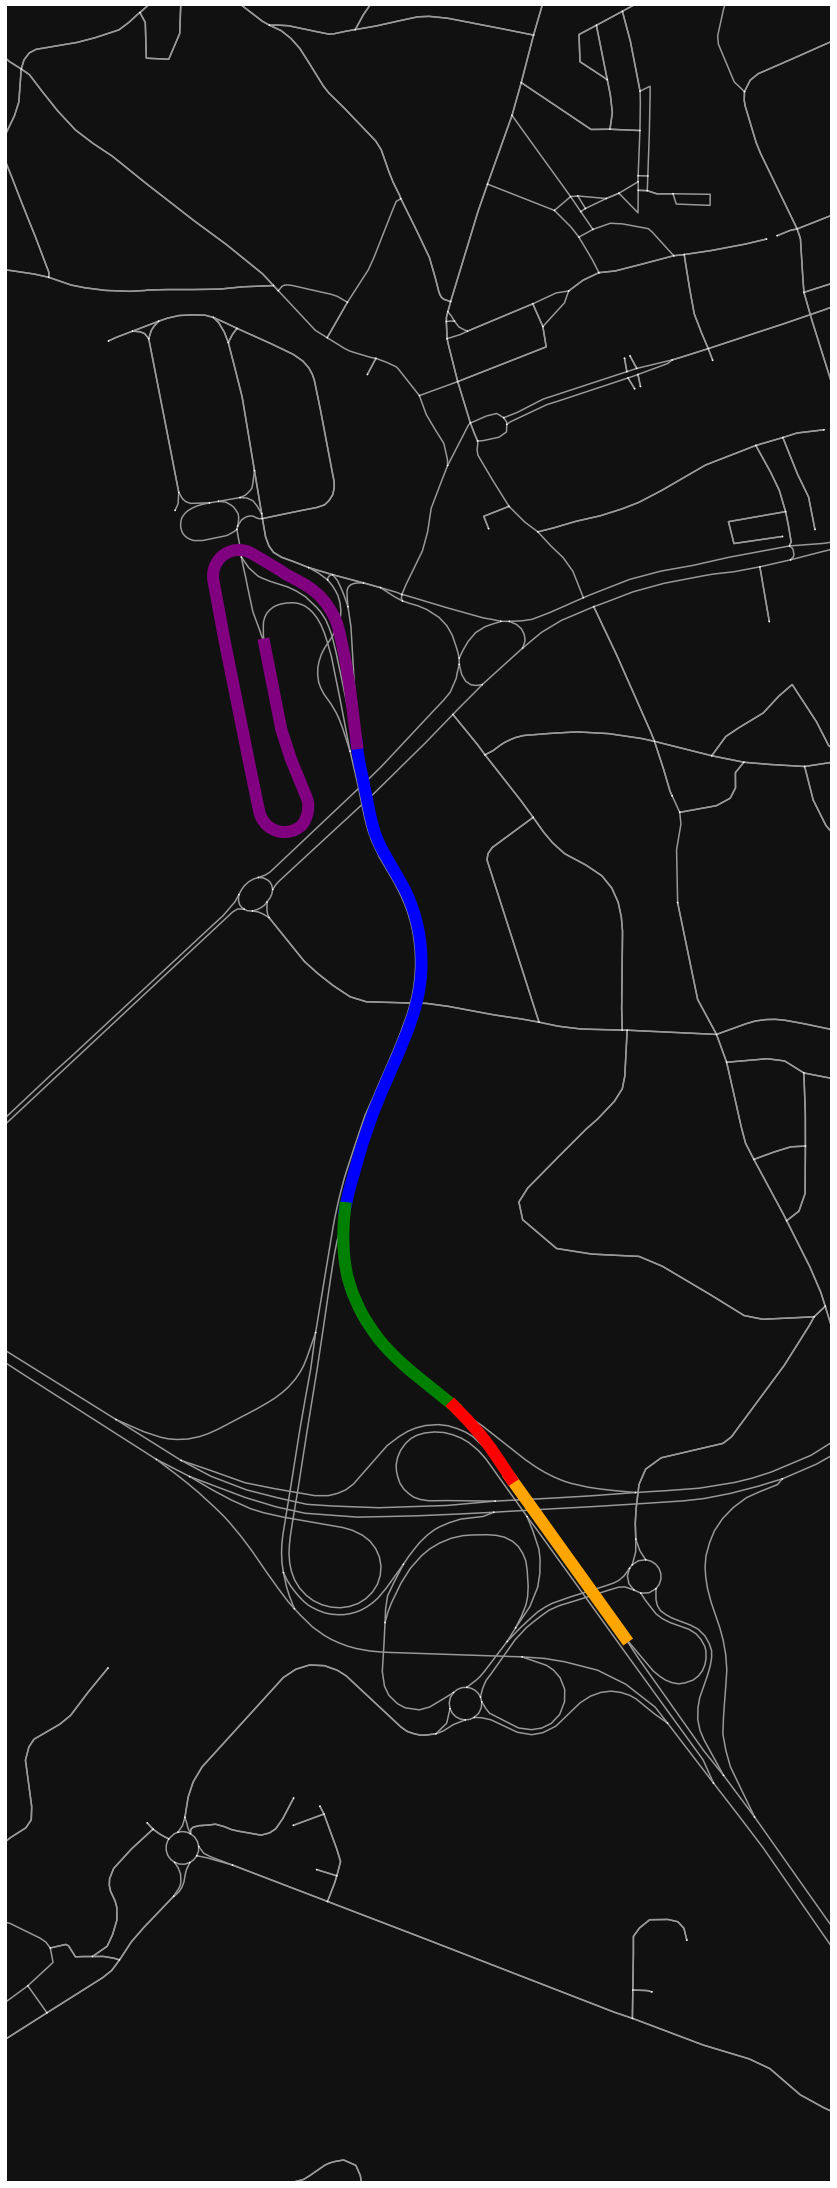

Route Visualization of 5 Most Frequently Traversed Road Segments is completed.


In [68]:
color_list = ['brown', 'pink', 'gray', 'olive', 'cyan']
visualization(most_freq_road, ['blue', 'orange', 'green', 'red', 'purple'], network_graph, '../result/task5/MostFrequent.png')
print(f'Route Visualization of 5 Most Frequently Traversed Road Segments is completed.')

# Most Time-consuming Road Segments
Return 5 road segments, whose average travelling time as indicated by the trajectory data are the largest

In [ ]:
travel_time = {}
for i in range(len(fmm_result)):
    if fmm_result['opath'][i]== '[]':
        continue
    edges = map(int, fmm_result['opath'][i][1:-1].split(', '))
    # opath： sequence of ids, edge matched to each point in trajectory
    single_time = {}
    for edge in edges:
        if edge in single_time.keys():
            single_time[edge]+= 1
        else:
            single_time[edge]=1
    # print(single_time)
    for edge in single_time.keys():
        if edge not in travel_time.keys():
            travel_time[edge] = []
        travel_time[edge].append(single_time[edge])
# print(travel_time)
average = {}
for edge in travel_time.keys():
    average[edge] = np.average(travel_time[edge])

long = sorted(average.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
longest = dict(long[:5])
# print(longest)
longest_road = list(longest.keys())
print("5 Most Time-consuming Road Segments: ", longest_road)

5 Most Time-consuming Road Segments:  [27824, 127368, 10980, 11311, 179093]


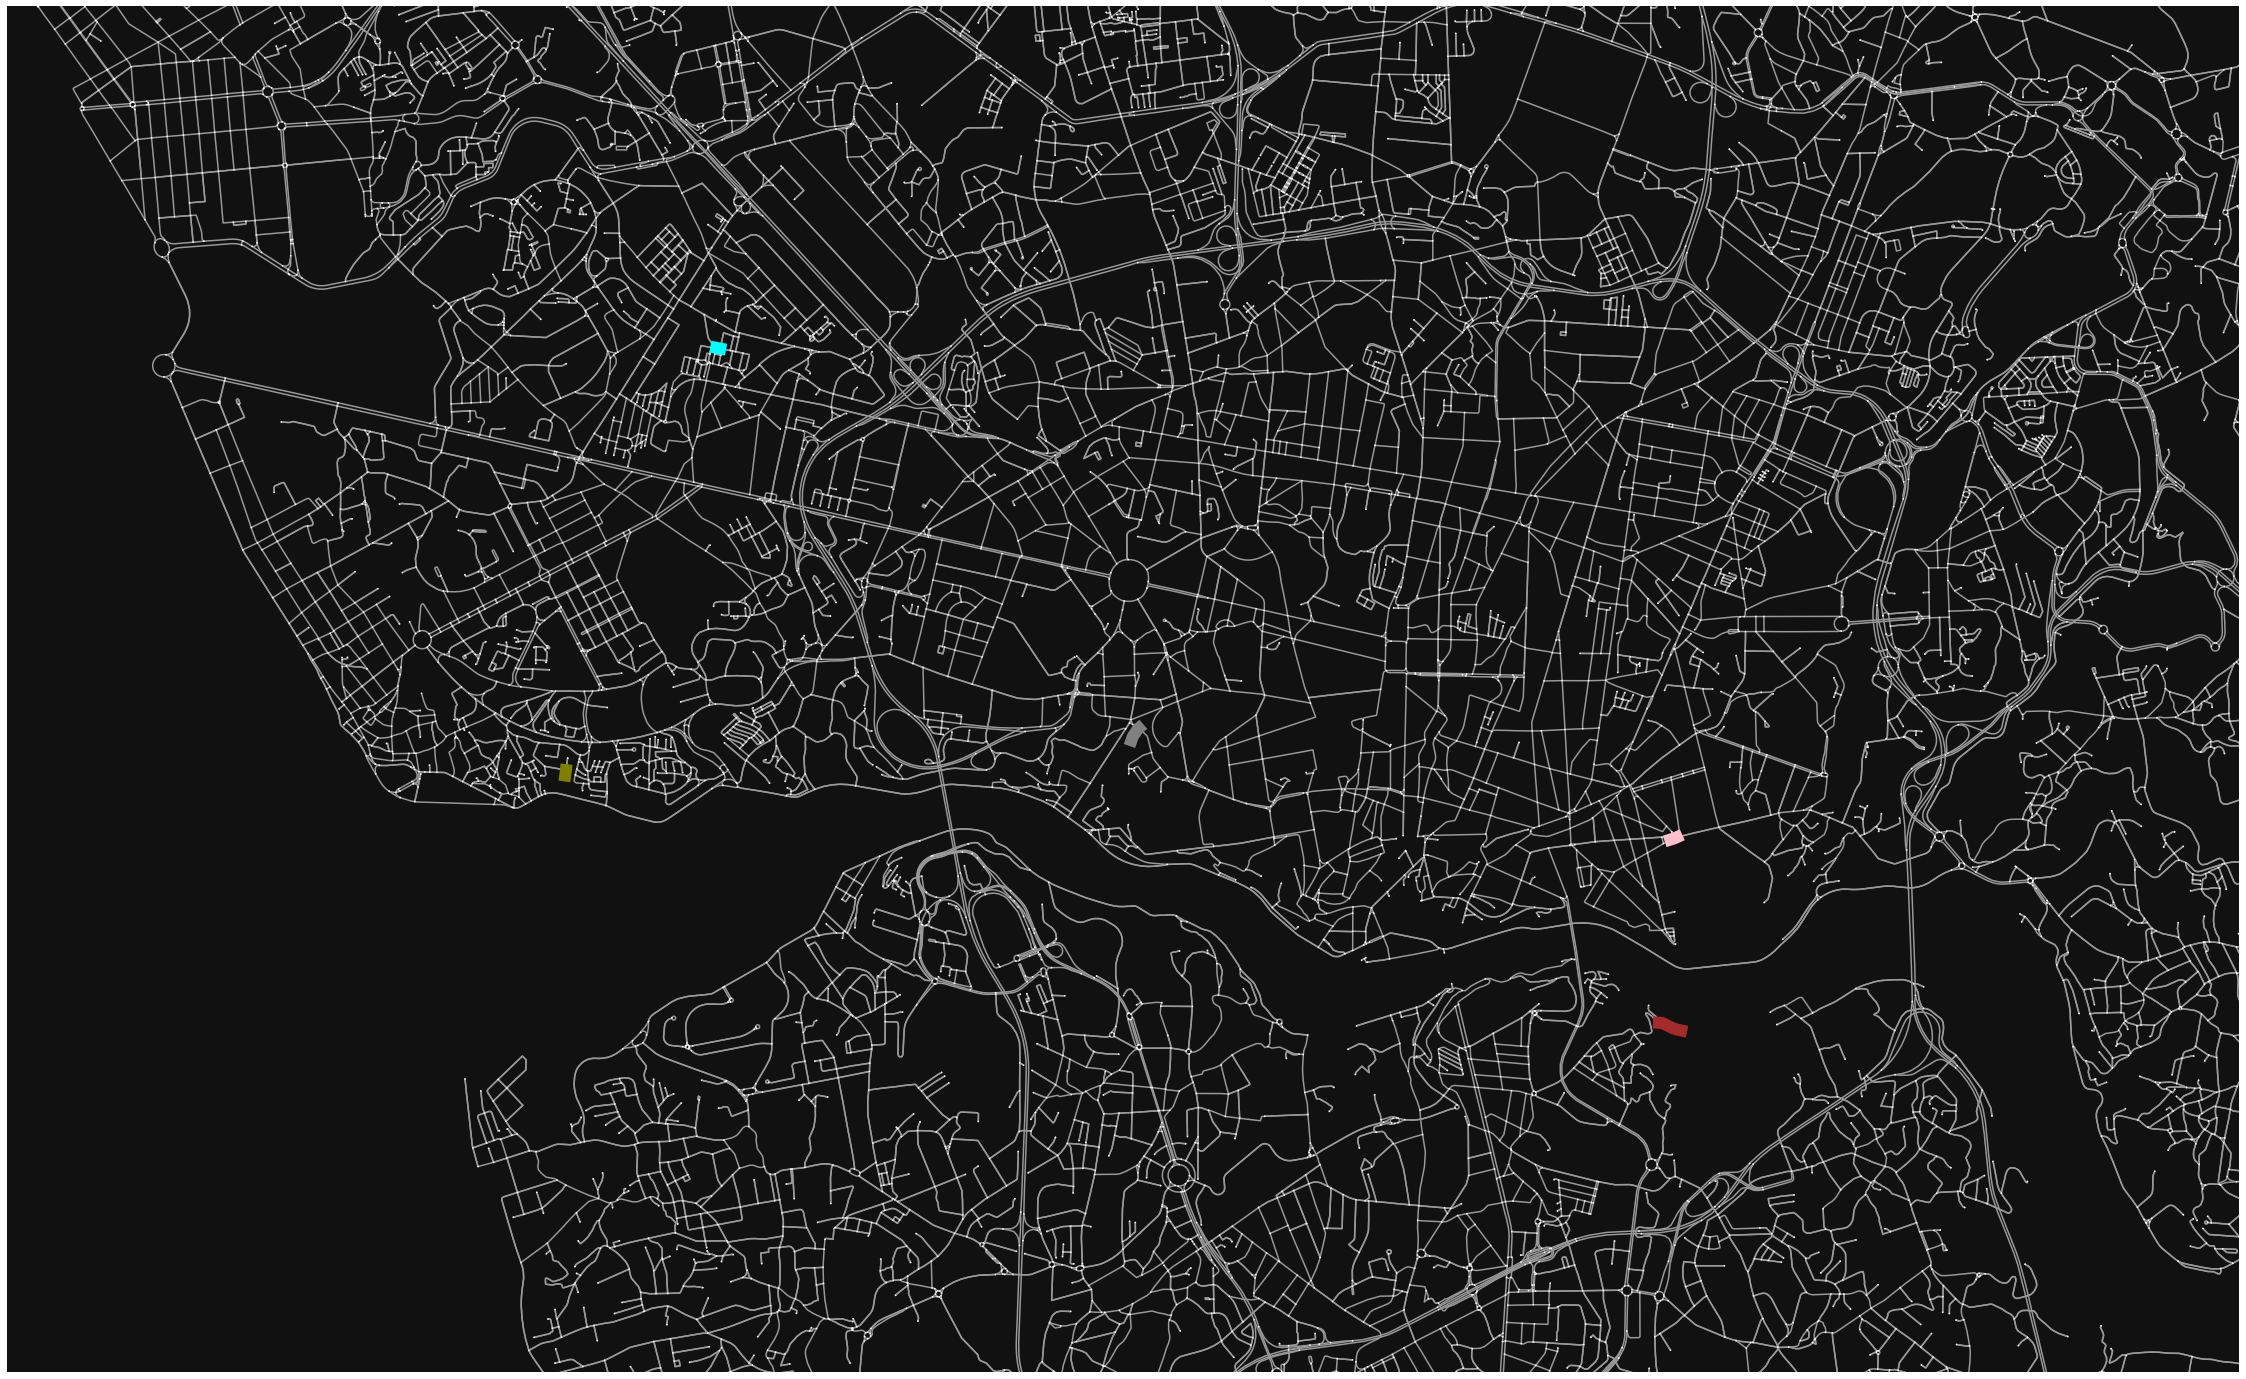

Route Visualization of 5 Most Time-consuming Road Segments is completed.


In [67]:
visualization(longest_road, ['brown', 'pink', 'gray', 'olive', 'cyan'], network_graph, '../result/task5/MostTimeConsuming.png')
print(f'Route Visualization of 5 Most Time-consuming Road Segments is completed.')